In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

# 1. IMPORT DATASET 

In [2]:
jan_mar = pd.read_csv('data/jan_mar.csv')
apr_may = pd.read_csv('data/apr_may.csv')
jun_sep = pd.read_csv('data/jun_sep.csv')
oct_dec = pd.read_csv('data/oct_dec.csv')

In [3]:
jan_mar

,ML #,Status,Address,S/A,Price,List Date,DOM,Tot BR,Tot Baths,TotFlArea,Yr Blt,Age,Frontage - Feet,Depth,#Kitchens,TypeDwel,Style of Home,List Price
0,R2428295,S,STALL81 1200 PACIFIC BOULEVARD,VVWYA,"$42,000",1/2/2020,363,0,0,0,1993,28,9.5,19,0,OTHER,OTHER,"$45,000"
1,R2537594,S,123 HIAWATHA DRIVE,VWVPR,"$171,000",2/5/2021,28,2,2,980,1983,38,NaN,NaN,1,MANUF,MANUF,"$180,000"
2,R2550318,S,481 RAINDANCE CRESCENT,VWVPR,"$337,000",3/12/2021,17,2,2,"1,232",1969,52,NaN,NaN,1,MANUF,MANUF,"$339,000"
3,R2529498,S,475 BAYVIEW ROAD,VWVLB,"$899,000",1/18/2021,35,0,0,"1,111",9999,999,108,141.45,0,OTHER,OTHER,"$899,000"
4,R2526903,S,3880 FLEMING STREET,VVEKN,"$946,000",1/3/2021,4,2,2,856,2014,7,NaN,NaN,1,TWNHS,"2ST, CORNU","$955,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,R2539775,S,3056 PROCTER AVENUE,VWVAL,"$12,890,000",2/16/2021,0,5,6,"5,673",2007,14,66.5,238'/214',1,HOUSE,3ST,"$13,500,000"
1385,R2452657,S,5791 NEWTON WYND,VVWUL,"$16,380,000",4/29/2020,324,6,9,"10,209",2016,5,65.01,299.95,2,HOUSE,"2BSMT, BSMNT","$17,980,000"
1386,R2509166,S,4351 ERWIN DRIVE,VWVCY,"$18,000,000",10/13/2020,160,6,8,"10,165",1980,41,148,45.11,1,HOUSE,2ST,"$23,989,000"
1387,R2408057,S,3190 TRAVERS AVENUE,VWVWB,"$19,199,000",9/23/2019,538,5,6,"8,871",2004,17,73.47,232.5,1,HOUSE,2BSMT,"$19,888,000"


# 2. COMBINE DATASET 

In [4]:
jan_dec = pd.concat([jan_mar,apr_may,jun_sep,oct_dec])

In [5]:
#jan_dec.to_excel('jan_dec.xlsx')

In [6]:
jan_dec = jan_dec.reset_index(drop=True)

# 3. CLEANING 

Dropped unnecessary columns such as [PicCount, Pics, S/A, Address, Status, Style of Home]

Dropped rows with null values in feet and Depth

In [7]:
jan_dec_dropped = jan_dec.drop(columns=['PicCount', 'Pics', 'S/A', 'Address', 'Status', 'Style of Home'])

In [8]:
jan_dec_dropped.dropna(axis=0).reset_index(drop=True)

,ML #,Price,List Date,DOM,Tot BR,Tot Baths,TotFlArea,Yr Blt,Age,Frontage - Feet,Depth,#Kitchens,TypeDwel,List Price
0,R2428295,"$42,000",1/2/2020,363,0,0,0,1993,28,9.5,19,0,OTHER,"$45,000"
1,R2529498,"$899,000",1/18/2021,35,0,0,"1,111",9999,999,108,141.45,0,OTHER,"$899,000"
2,R2527692,"$975,000",1/11/2021,4,3,3,"1,704",1988,33,0,0,1,HOUSE,"$979,000"
3,R2522424,"$1,050,000",12/8/2020,82,2,1,819,1914,107,33,128,1,HOUSE,"$1,088,000"
4,R2553242,"$1,105,000",3/18/2021,11,2,1,820,1955,66,33,102.9,1,HOUSE,"$999,900"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,R2596634,"$11,500,000",6/25/2021,123,7,10,"7,746",2020,1,66.00,174.63,2,HOUSE,"$13,888,000"
4298,R2623529,"$11,700,000",10/4/2021,42,3,4,"2,896",2010,11,33.00,106,1,HOUSE,"$12,800,000"
4299,R2569911,"$12,000,000",4/21/2021,193,7,7,"12,377",1980,41,105.00,300,1,HOUSE,"$14,880,000"
4300,R2606494,"$13,800,000",7/30/2021,72,6,8,"4,243",1910,111,217.00,150.00,2,HOUSE,"$17,000,000"


Check for missing values

In [9]:
jan_dec_dropped.isna().sum()

ML #                 0
Price                0
List Date            0
DOM                  0
Tot BR               0
Tot Baths            0
TotFlArea            0
Yr Blt               0
Age                  0
Frontage - Feet     23
Depth              533
#Kitchens            0
TypeDwel             0
List Price           0
dtype: int64

# 4. DATA TRANSFORMATION AND FURTHER CLEANING

Transform [List Date] to Month, Day, Year

Transform [HOUSE,OTHER,HACR,TWNHS] to numeric index

Change data type from str to num or the other way around, taking out commas & dollarsign 

Dropped 1020 rows of zero Frontage - Feet

Dropped Depth due to inconsistent formatting

Filtered out erroneous built years such as 9999 etc, set reasonable range

Retain either Yr built or Age 

'Frontage - Feet' has outlier, eg 17500 comparing to the mean of 57, filtered everything over 500





In [10]:
import datetime as dt

In [11]:
jan_dec_dropped['List Date'] = pd.to_datetime(jan_dec_dropped['List Date'])
jan_dec_dropped['List Date'] = pd.to_datetime(jan_dec_dropped['List Date'].dt.date)

In [12]:
jan_dec_dropped['List_Year'] = jan_dec_dropped['List Date'].dt.year
jan_dec_dropped['List_Month'] = jan_dec_dropped['List Date'].dt.month
jan_dec_dropped['List_Day'] = jan_dec_dropped['List Date'].dt.day

In [13]:
jan_dec_dropped['TypeDwel'].value_counts()

HOUSE    4798
OTHER      13
TWNHS      10
HACR        9
MANUF       5
Name: TypeDwel, dtype: int64

In [14]:
jan_dec_dropped['TypeDwel'] = jan_dec_dropped['TypeDwel'].replace(['HOUSE','OTHER','HACR','TWNHS'],['1','2','3','4'])

In [15]:
jan_dec_dropped.dtypes

ML #                       object
Price                      object
List Date          datetime64[ns]
DOM                         int64
Tot BR                      int64
Tot Baths                   int64
TotFlArea                  object
Yr Blt                      int64
Age                         int64
Frontage - Feet            object
Depth                      object
#Kitchens                   int64
TypeDwel                   object
List Price                 object
List_Year                   int64
List_Month                  int64
List_Day                    int64
dtype: object

In [16]:
jan_dec_dropped['Depth'] = jan_dec_dropped['Depth'].str.replace("'",'.')

In [17]:
jan_dec_dropped['Price'] = jan_dec_dropped['Price'].str.replace('$','')
jan_dec_dropped['Price'] = jan_dec_dropped['Price'].str.replace(',','')
jan_dec_dropped['List Price'] = jan_dec_dropped['List Price'].str.replace('$','')
jan_dec_dropped['List Price'] = jan_dec_dropped['List Price'].str.replace(',','')
jan_dec_dropped['TotFlArea'] = jan_dec_dropped['TotFlArea'].str.replace(',','')
jan_dec_dropped['Frontage - Feet'] = jan_dec_dropped['Frontage - Feet'].str.replace(',','')

/var/folders/c5/51_z_npj2j9020ysvx29s1jr0000gn/T/ipykernel_1867/2503814805.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  jan_dec_dropped['Price'] = jan_dec_dropped['Price'].str.replace('$','')
/var/folders/c5/51_z_npj2j9020ysvx29s1jr0000gn/T/ipykernel_1867/2503814805.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  jan_dec_dropped['List Price'] = jan_dec_dropped['List Price'].str.replace('$','')


In [18]:
jan_dec_dropped['Price'] = jan_dec_dropped['Price'].astype('float64')
jan_dec_dropped['List Price'] = jan_dec_dropped['List Price'].astype('float64')
jan_dec_dropped['TotFlArea'] = jan_dec_dropped['TotFlArea'].astype('float64')
jan_dec_dropped['Frontage - Feet'] = jan_dec_dropped['Frontage - Feet'].astype('float64')

In [19]:
jan_dec_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ML #             4835 non-null   object        
 1   Price            4835 non-null   float64       
 2   List Date        4835 non-null   datetime64[ns]
 3   DOM              4835 non-null   int64         
 4   Tot BR           4835 non-null   int64         
 5   Tot Baths        4835 non-null   int64         
 6   TotFlArea        4835 non-null   float64       
 7   Yr Blt           4835 non-null   int64         
 8   Age              4835 non-null   int64         
 9   Frontage - Feet  3684 non-null   float64       
 10  Depth            4302 non-null   object        
 11  #Kitchens        4835 non-null   int64         
 12  TypeDwel         4835 non-null   object        
 13  List Price       4835 non-null   float64       
 14  List_Year        4835 non-null   int64  

In [20]:
jan_dec_dropped.isnull().sum()

ML #                  0
Price                 0
List Date             0
DOM                   0
Tot BR                0
Tot Baths             0
TotFlArea             0
Yr Blt                0
Age                   0
Frontage - Feet    1151
Depth               533
#Kitchens             0
TypeDwel              0
List Price            0
List_Year             0
List_Month            0
List_Day              0
dtype: int64

After converting Frontage feet into numbers, there are actually 1020 zeros that has to be dropped

In [21]:
jan_dec_dropped[jan_dec_dropped['Frontage - Feet']==0]

,ML #,Price,List Date,DOM,Tot BR,Tot Baths,TotFlArea,Yr Blt,Age,Frontage - Feet,Depth,#Kitchens,TypeDwel,List Price,List_Year,List_Month,List_Day
5,R2527692,975000.0,2021-01-11,4,3,3,1704.0,1988,33,0.0,0,1,1,979000.0,2021,1,11
26,R2553567,1253000.0,2021-03-19,11,2,1,920.0,1954,67,0.0,NaN,1,1,1190000.0,2021,3,19
50,R2546350,1345000.0,2021-03-04,11,3,2,1348.0,2013,8,0.0,NaN,1,1,1358000.0,2021,3,4
65,R2555789,1375000.0,2021-03-22,8,5,3,1950.0,1912,109,0.0,NaN,3,1,1288000.0,2021,3,22
77,R2523709,1399000.0,2020-12-14,32,3,4,1658.0,2020,1,0.0,NaN,1,1,1399900.0,2020,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4654,R2634874,3580000.0,2021-11-22,7,6,6,6150.0,2017,4,0.0,NaN,3,1,3995000.0,2021,11,22
4675,R2638008,3700000.0,2021-12-08,6,3,4,4278.0,1981,40,0.0,NaN,1,1,3998000.0,2021,12,8
4763,R2599590,4800000.0,2021-07-07,86,5,4,4036.0,1981,40,0.0,NaN,1,1,4900000.0,2021,7,7
4806,R2622389,6300000.0,2021-09-30,2,3,3,3678.0,1990,31,0.0,NaN,1,1,6580000.0,2021,9,30


In [22]:
jan_dec_dropped_V2 = jan_dec_dropped.dropna(axis=0)

In [23]:
jan_dec_dropped_V2.isnull().sum()

ML #               0
Price              0
List Date          0
DOM                0
Tot BR             0
Tot Baths          0
TotFlArea          0
Yr Blt             0
Age                0
Frontage - Feet    0
Depth              0
#Kitchens          0
TypeDwel           0
List Price         0
List_Year          0
List_Month         0
List_Day           0
dtype: int64

In [24]:
jan_dec_dropped_V2['Yr Blt']

0       1993
3       9999
5       1988
6       1914
7       1955
        ... 
4830    2020
4831    2010
4832    1980
4833    1910
4834    2016
Name: Yr Blt, Length: 3282, dtype: int64

In [25]:
jan_dec_dropped_V2 = jan_dec_dropped_V2[(jan_dec_dropped_V2['Yr Blt']<2023) & (jan_dec_dropped_V2['Yr Blt']>1900)] 

In [26]:
jan_dec_dropped_V2 = jan_dec_dropped_V2.drop(columns=['Age'])

In [27]:
jan_dec_dropped_V2 = jan_dec_dropped_V2.drop(columns=['Depth'])

In [28]:
jan_dec_dropped_V2['Frontage - Feet'].describe()

count     3239.000000
mean        57.015354
std        310.649093
min          0.000000
25%         33.000000
50%         44.000000
75%         60.000000
max      17625.000000
Name: Frontage - Feet, dtype: float64

In [29]:
sum(jan_dec_dropped_V2['Frontage - Feet']>500)

2

In [30]:
jan_dec_dropped_V2 = jan_dec_dropped_V2[jan_dec_dropped_V2['Frontage - Feet']<500]

In [31]:
jan_dec_dropped_V2.dtypes

ML #                       object
Price                     float64
List Date          datetime64[ns]
DOM                         int64
Tot BR                      int64
Tot Baths                   int64
TotFlArea                 float64
Yr Blt                      int64
Frontage - Feet           float64
#Kitchens                   int64
TypeDwel                   object
List Price                float64
List_Year                   int64
List_Month                  int64
List_Day                    int64
dtype: object

In [32]:
jan_dec_dropped_V2['TypeDwel'] = jan_dec_dropped_V2['TypeDwel'].astype('object')
jan_dec_dropped_V2['List_Year'] = jan_dec_dropped_V2['List_Year'].astype('object')
jan_dec_dropped_V2['List_Month'] = jan_dec_dropped_V2['List_Month'].astype('object')
jan_dec_dropped_V2['List_Day'] = jan_dec_dropped_V2['List_Day'].astype('object')

In [33]:
def Property_Age(X):
    return (X-2022)*-1

jan_dec_dropped_V2['Age'] = jan_dec_dropped_V2['Yr Blt'].apply(Property_Age)

In [34]:
jan_dec_dropped_V2 = jan_dec_dropped_V2.drop(columns=['Yr Blt']).reset_index(drop=True)

# 5. Check relationships between columns 

In [35]:
jan_dec_dropped_V2

,ML #,Price,List Date,DOM,Tot BR,Tot Baths,TotFlArea,Frontage - Feet,#Kitchens,TypeDwel,List Price,List_Year,List_Month,List_Day,Age
0,R2428295,42000.0,2020-01-02,363,0,0,0.0,9.5,0,2,45000.0,2020,1,2,29
1,R2527692,975000.0,2021-01-11,4,3,3,1704.0,0.0,1,1,979000.0,2021,1,11,34
2,R2522424,1050000.0,2020-12-08,82,2,1,819.0,33.0,1,1,1088000.0,2020,12,8,108
3,R2553242,1105000.0,2021-03-18,11,2,1,820.0,33.0,1,1,999900.0,2021,3,18,67
4,R2538672,1150000.0,2021-02-12,10,2,1,770.0,33.0,1,1,1100000.0,2021,2,12,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,R2596634,11500000.0,2021-06-25,123,7,10,7746.0,66.0,2,1,13888000.0,2021,6,25,2
3233,R2623529,11700000.0,2021-10-04,42,3,4,2896.0,33.0,1,1,12800000.0,2021,10,4,12
3234,R2569911,12000000.0,2021-04-21,193,7,7,12377.0,105.0,1,1,14880000.0,2021,4,21,42
3235,R2606494,13800000.0,2021-07-30,72,6,8,4243.0,217.0,2,1,17000000.0,2021,7,30,112


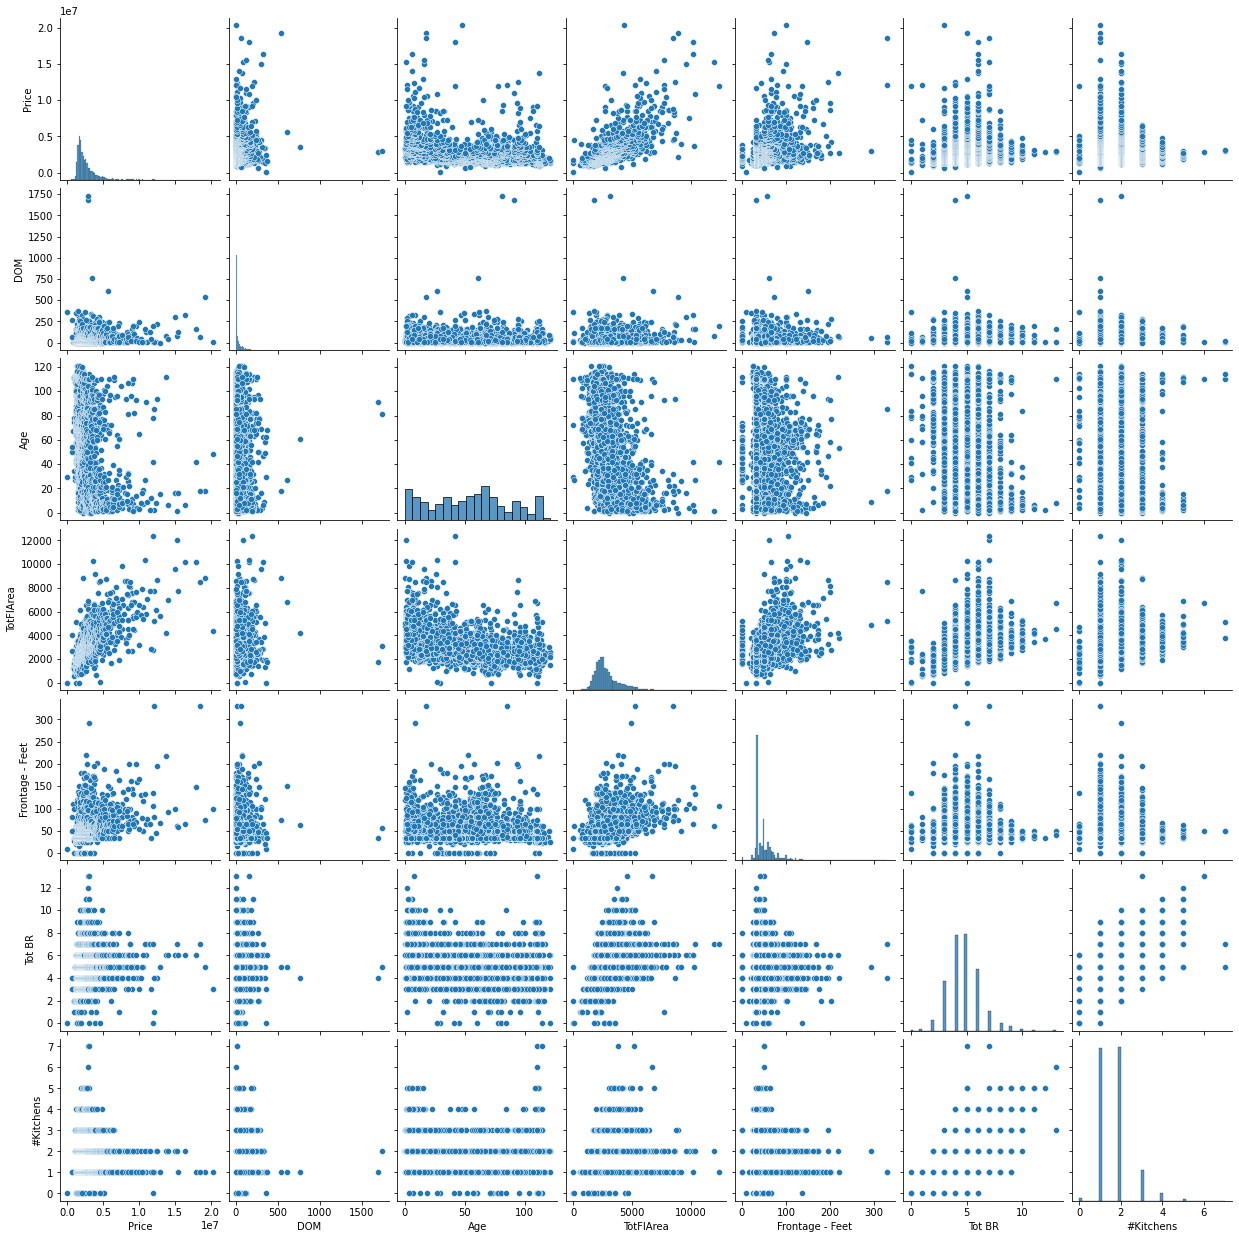

In [36]:
sns.pairplot(jan_dec_dropped_V2,
             vars=['Price','DOM','Age','TotFlArea','Frontage - Feet','Tot BR','#Kitchens'],
             )

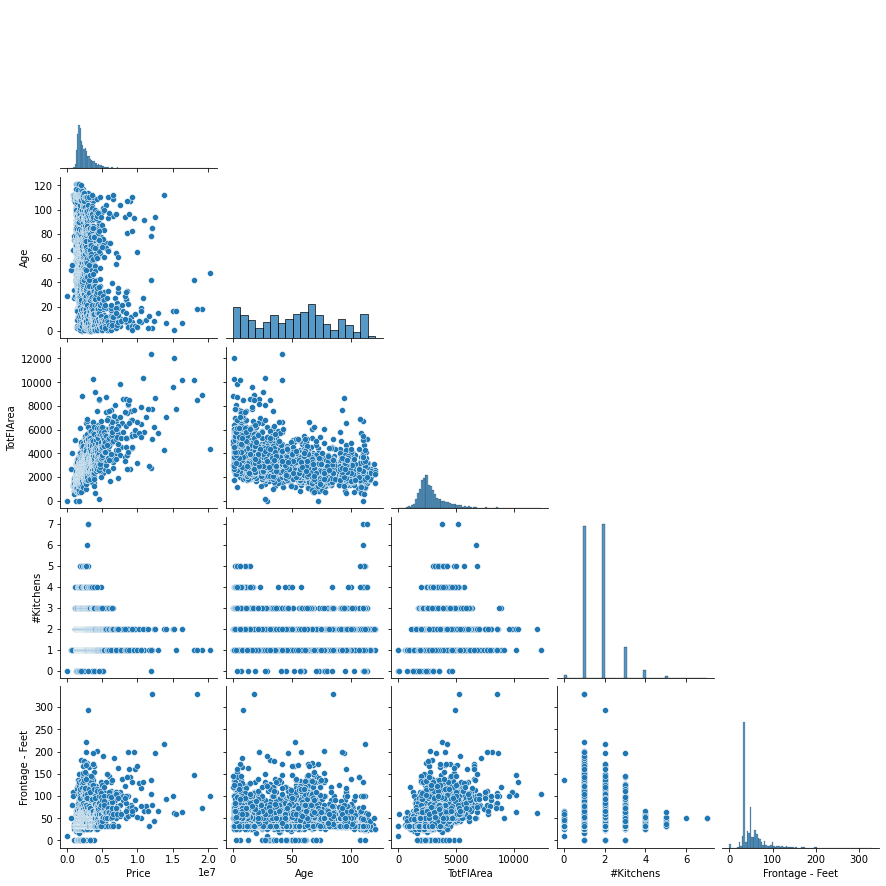

In [37]:
sns.pairplot(jan_dec_dropped_V2,
             vars=['Price','Age','TotFlArea','#Kitchens','Frontage - Feet'],
             corner=True
             )

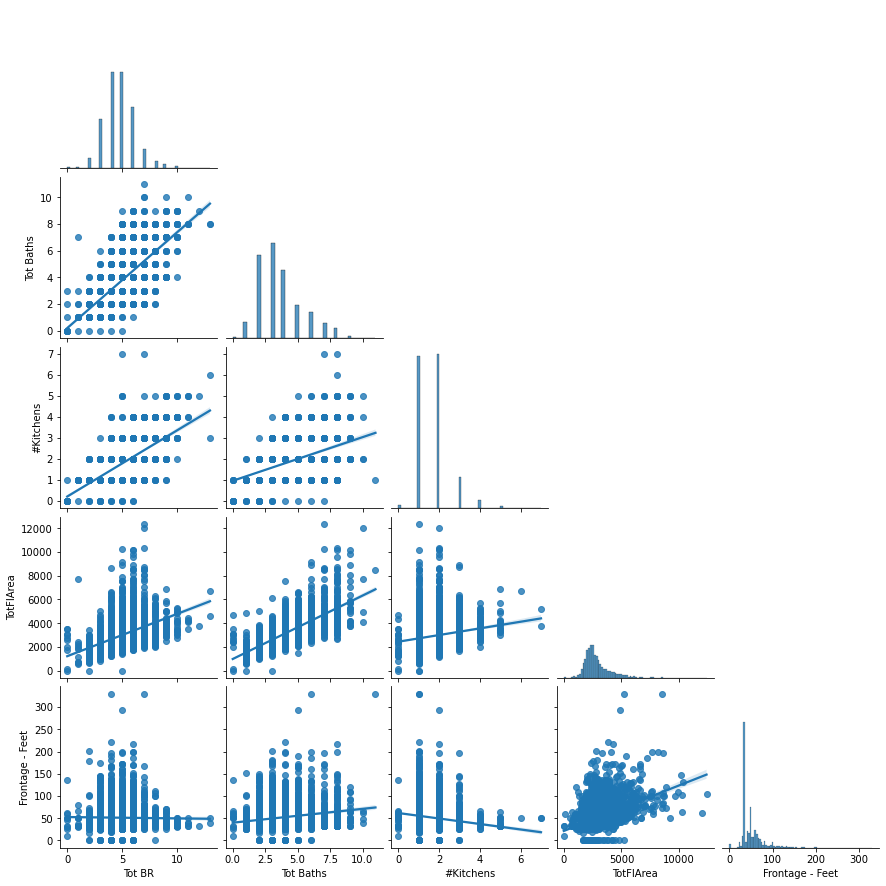

In [38]:
sns.pairplot(jan_dec_dropped_V2,
             kind='reg',
             vars=['Tot BR','Tot Baths','#Kitchens','TotFlArea','Frontage - Feet'],
             corner=True)

Frontage-Feet and TotFlArea are highly correlated

Kitchen and Tot BR and Tot Baths are highly correlated 

I think Kitchen and Floor Area 

In [39]:
jan_dec_dropped_V2.dtypes

ML #                       object
Price                     float64
List Date          datetime64[ns]
DOM                         int64
Tot BR                      int64
Tot Baths                   int64
TotFlArea                 float64
Frontage - Feet           float64
#Kitchens                   int64
TypeDwel                   object
List Price                float64
List_Year                  object
List_Month                 object
List_Day                   object
Age                         int64
dtype: object

In [40]:
#jan_dec_dropped_V2.to_csv('cleaned_no_dummies.csv')

In [41]:
#jan_dec_dropped_V2.to_excel('cleaned_no_dummies.xlsx')

# 6. MODEL TRAINING AND ONE HOT ENCODING

Data preparation for excel regression model

In [42]:
data_for_benchmark_model = jan_dec_dropped_V2.copy()

In [43]:
input_features = ['Age','DOM','Tot BR','Tot Baths','TotFlArea','Frontage - Feet','#Kitchens','TypeDwel','List_Month']
target_feature = ['Price']
All_features = target_feature + input_features 

In [44]:
X_bench = data_for_benchmark_model[input_features]
XY_bench = data_for_benchmark_model[All_features]

In [45]:
X_bench_dum = pd.get_dummies(X_bench)
X_bench_dum

,Age,DOM,Tot BR,Tot Baths,TotFlArea,Frontage - Feet,#Kitchens,TypeDwel_1,TypeDwel_2,TypeDwel_3,...,List_Month_3,List_Month_4,List_Month_5,List_Month_6,List_Month_7,List_Month_8,List_Month_9,List_Month_10,List_Month_11,List_Month_12
0,29,363,0,0,0.0,9.5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,34,4,3,3,1704.0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,108,82,2,1,819.0,33.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,67,11,2,1,820.0,33.0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,68,10,2,1,770.0,33.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,2,123,7,10,7746.0,66.0,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3233,12,42,3,4,2896.0,33.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3234,42,193,7,7,12377.0,105.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3235,112,72,6,8,4243.0,217.0,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
XY_bench = pd.get_dummies(XY_bench)
XY_bench

,Price,Age,DOM,Tot BR,Tot Baths,TotFlArea,Frontage - Feet,#Kitchens,TypeDwel_1,TypeDwel_2,...,List_Month_3,List_Month_4,List_Month_5,List_Month_6,List_Month_7,List_Month_8,List_Month_9,List_Month_10,List_Month_11,List_Month_12
0,42000.0,29,363,0,0,0.0,9.5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,975000.0,34,4,3,3,1704.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1050000.0,108,82,2,1,819.0,33.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1105000.0,67,11,2,1,820.0,33.0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1150000.0,68,10,2,1,770.0,33.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,11500000.0,2,123,7,10,7746.0,66.0,2,1,0,...,0,0,0,1,0,0,0,0,0,0
3233,11700000.0,12,42,3,4,2896.0,33.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3234,12000000.0,42,193,7,7,12377.0,105.0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3235,13800000.0,112,72,6,8,4243.0,217.0,2,1,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
#XY_bench.to_excel('cleaned_with_dummies.xlsx')

# Data prep

In [99]:
data_for_dom_model = jan_dec_dropped_V2.copy()

In [100]:
test_features_dom = ['Age','Tot BR','Tot Baths','TotFlArea','Frontage - Feet','#Kitchens']
input_features_dom = ['Age','Tot BR','TotFlArea','Frontage - Feet']
target_feature_dom = ['Price']

Train Test Split

In [101]:
from sklearn.model_selection import train_test_split

X_bench = data_for_dom_model[input_features_dom]
Y_bench = data_for_dom_model[target_feature_dom]

# one-hot encoding for categorical features
X_bench = pd.get_dummies(X_bench)

X_train, X_test, y_train, y_test = train_test_split(X_bench, Y_bench, test_size=0.3, random_state=42)

#  Testing different models 

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_bench, Y_bench, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

y_pred = rando_model.predict(X_test)

/var/folders/c5/51_z_npj2j9020ysvx29s1jr0000gn/T/ipykernel_1867/1373745261.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rando_model.fit(X_train, y_train)


RandomForestRegressor()

In [106]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 622839.2189067214
mean_squared_error 1247460999453.6667
root_mean_squared_error 1116897.9360056436
r2 0.5561655413046243


<AxesSubplot:>

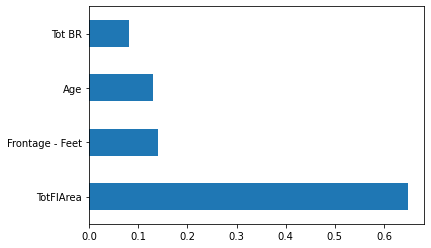

In [107]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
 .nlargest(10).plot(kind='barh'))

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

grad_model = GradientBoostingRegressor()
grad_model.fit(X_train, y_train)

/Users/jonathanau/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [109]:
model_at_hand = grad_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 624876.6741293183
mean_squared_error 1263014908511.921
root_mean_squared_error 1123839.3606347488
r2 0.5506316121393111


<AxesSubplot:>

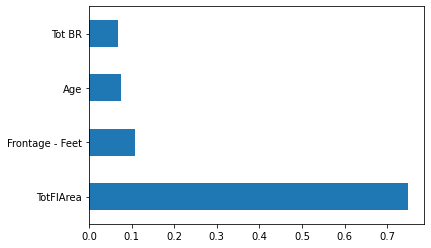

In [110]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
 .nlargest(10).plot(kind='barh'))